In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Bring in the data

In [17]:
RawData = pd.read_csv('Lincoln.met', index_col= False, sep = '\t', names =['Year','Day','MinT','MaxT','Rain','Radn','Wind','vp'])
RawData.set_index(['Year','Day'],inplace=True,drop=False)
RawData.where(RawData>-90,np.nan,inplace=True)

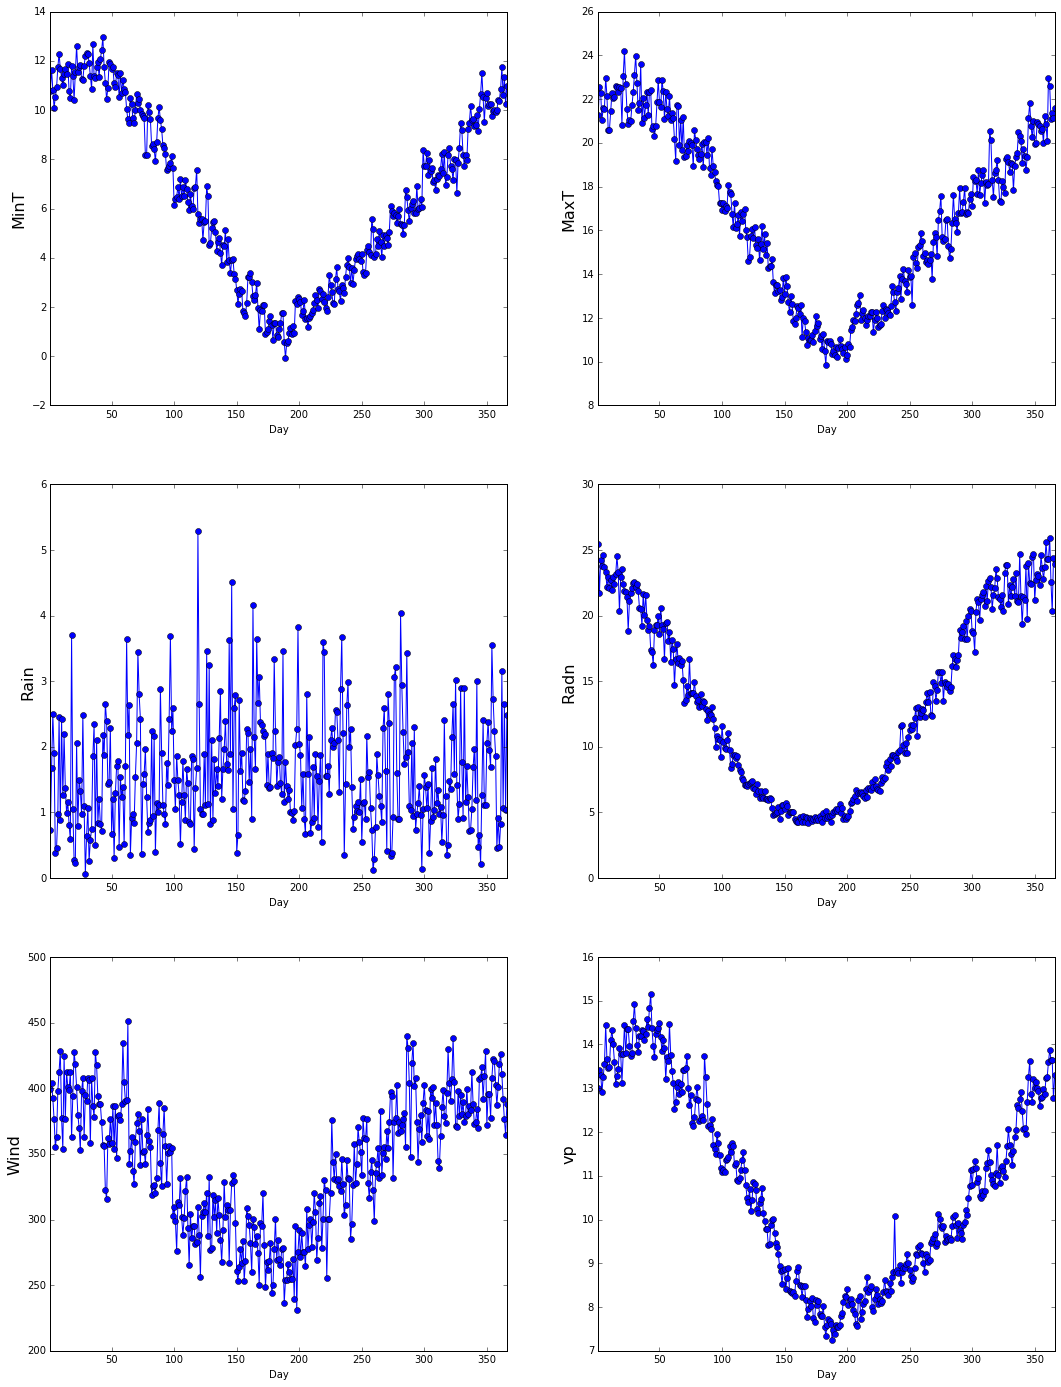

In [12]:
Fig = plt.figure(figsize = (18,24))
Position = 1
for x in [u'MinT', u'MaxT', u'Rain', u'Radn', u'Wind', u'vp']:
    Fig.add_subplot(3,2,Position)
    Means = RawData.groupby(level='Day').mean()
    Means.ix[:,x].plot(marker='o')
    plt.ylabel(x,fontsize = 16)
    Position +=1

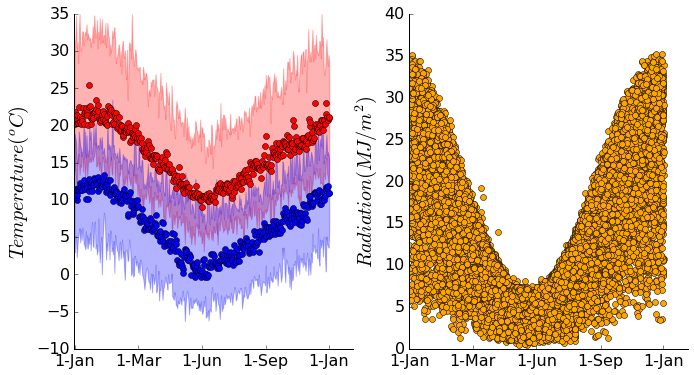

In [13]:
Fig = plt.figure(figsize = (11,6))
#for x in [u'MinT', u'MaxT', u'Rain', u'Radn', u'Wind', u'vp']:
Ax = Fig.add_subplot(1,2,1)
plt.tick_params(labelsize=16)
Ax.spines['right'].set_visible(False)
Ax.spines['top'].set_visible(False)
plt.tick_params(axis='x', which='both', bottom='on',top='off', labelbottom='on')
plt.tick_params(axis='y', which='both', left='on',right='off', labelbottom='on')
Medians = RawData.ix[:,'MaxT'].groupby(level='Day').median()
#SEs = RawData.groupby(level='Day').std()
Upper = RawData.ix[:,'MaxT'].groupby(level='Day').max()
Lower = RawData.ix[:,'MaxT'].groupby(level='Day').min()
plt.fill_between(Medians.index,
                     Upper,
                     Lower,
                alpha = 0.3,color='r')
plt.plot(Medians,'o',color='r')
Medians = RawData.ix[:,'MinT'].groupby(level='Day').median()
#SEs = RawData.groupby(level='Day').std()
Upper = RawData.ix[:,'MinT'].groupby(level='Day').max()
Lower = RawData.ix[:,'MinT'].groupby(level='Day').min()
plt.fill_between(Medians.index,
                     Upper,
                     Lower,
                alpha = 0.3,color='b')
plt.plot(Medians,'o',color='b')
plt.ylabel(r'$Temperature (^oC)$',fontsize=20)
Ax.set_xticks([1,92,183,275,365])
Ax.set_xticklabels(['1-Jan','1-Mar','1-Jun','1-Sep','1-Jan'])
Ax = Fig.add_subplot(1,2,2)
plt.tick_params(labelsize=16)
Ax.spines['right'].set_visible(False)
Ax.spines['top'].set_visible(False)
plt.tick_params(axis='x', which='both', bottom='on',top='off', labelbottom='on')
plt.tick_params(axis='y', which='both', left='on',right='off', labelbottom='on')
DayIndexed = RawData.copy()
DayIndexed.index = DayIndexed.index.droplevel('Year')
plt.plot(DayIndexed.index,DayIndexed.ix[:,'Radn'],'o',color='orange')
plt.ylabel(r'$Radiation (MJ/m^2)$',fontsize=20)
Ax.set_xticks([1,92,183,275,365])
Ax.set_xticklabels(['1-Jan','1-Mar','1-Jun','1-Sep','1-Jan'])

# Replace suspect data with -99, or

In [14]:
CleanData = RawData.copy()
CleanData.ix[:,'MinT'].where(CleanData.ix[:,'MinT']>-10,-99,inplace=True)
CleanData.ix[:,'MaxT'].where(CleanData.ix[:,'MaxT']<35,-99,inplace=True)
CleanData.ix[:,'Rain'].where(CleanData.ix[:,'Rain']<200,-99,inplace=True)
CleanData.ix[:,'Radn'].where(CleanData.ix[:,'Radn']<35,-99,inplace=True)
CleanData.ix[:,'Wind'].where(CleanData.ix[:,'Wind']<2000,-99,inplace=True)
CleanData.ix[:,'vp'].where(CleanData.ix[:,'vp']<30,-99,inplace=True)

# Replace suspect data with long term mean

In [18]:
for var in [u'MinT', u'MaxT', u'Rain', u'Radn', u'Wind', u'vp']:
    for x in CleanData.index:
        Day = CleanData.ix[x,'Day']
        if CleanData.ix[x,var] == -99:
            CleanData.ix[x,var] = Means.ix[Day,var]

# Put in a Date column

In [31]:
for x in CleanData.index:
    OneDate = datetime.datetime(CleanData.ix[x,'Year'],1,1)
    JDayLessOne = int(CleanData.ix[x,'Day']-1)
    TodayDate = OneDate + datetime.timedelta(JDayLessOne)
    CleanData.ix[x,'Date'] = TodayDate

In [32]:
CleanData.to_csv('LincolnClean.met',sep='\t')

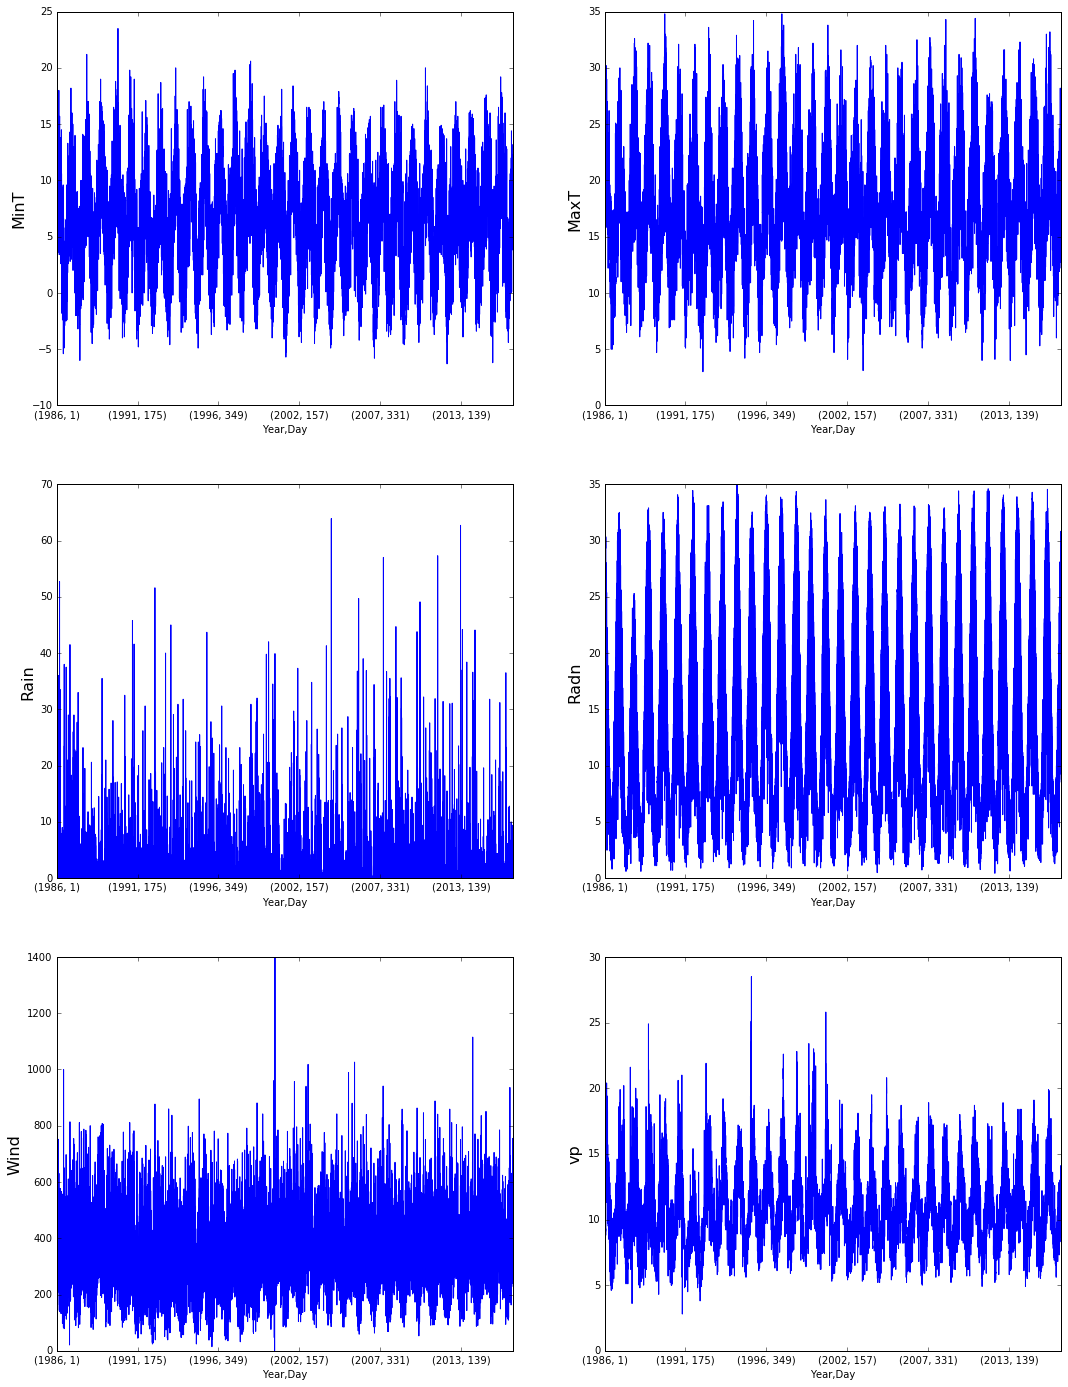

In [42]:
Fig = plt.figure(figsize = (18,24))
Position = 1
for x in [u'MinT', u'MaxT', u'Rain', u'Radn', u'Wind', u'vp']:
    Fig.add_subplot(3,2,Position)
    CleanData.ix[:,x].plot()
    plt.ylabel(x,fontsize = 16)
    Position +=1

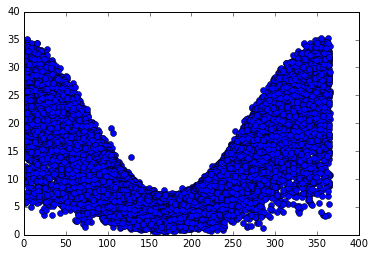

In [43]:
DayIndexed = RawData.copy()
DayIndexed.index = DayIndexed.index.droplevel('Year')
plt.plot(DayIndexed.index,DayIndexed.ix[:,'Radn'],'o')
